# Naive Bayes

### データ前処理

In [1]:
import pickle
with open('save_count_id_df/3_gram_tanka_count_id.pkl', 'rb') as f:
    bow_tanka = pickle.load(f)
with open('save_count_id_df/3_gram_waka_count_id.pkl', 'rb') as f:
    bow_waka = pickle.load(f)


In [2]:
bow_tanka

,あかか,かから,からは,みるへ,るへき,へきも,きもの,ものを,かりか,りかね,...,もめじ,ぶんさ,へそは,みるち,へしり,するゆ,ゆめあ,ばゆた,てんぞ,じるよ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
bow_waka

,あかか,かから,からは,みるへ,るへき,へきも,きもの,ものを,かりか,りかね,...,もめじ,ぶんさ,へそは,みるち,へしり,するゆ,ゆめあ,ばゆた,てんぞ,じるよ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14288,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
bow_tanka = bow_tanka.astype('int8')
bow_waka = bow_waka.astype('int8')

In [3]:
import pandas as pd
X_nv = pd.concat([bow_tanka, bow_waka], ignore_index=True, copy=False)
y_nv = ['tanka']*len(bow_tanka) + ['waka']*len(bow_waka)

In [7]:
X_nv

,あかか,かから,からは,みるへ,るへき,へきも,きもの,ものを,かりか,りかね,...,もめじ,ぶんさ,へそは,みるち,へしり,するゆ,ゆめあ,ばゆた,てんぞ,じるよ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29214,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_nv

['tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',
 'tanka',


### 訓練

In [4]:
from lstm_naivebayes import NaiveBayes
nv = NaiveBayes()

In [5]:
from sklearn.model_selection import train_test_split
X_nv_train, X_nv_test, y_nv_train, y_nv_test = train_test_split(X_nv, y_nv, stratify=y_nv)

In [6]:
%%time
nv.fit(X_nv_train, y_nv_train)

CPU times: total: 5.44 s
Wall time: 5.44 s


In [7]:
%%time
from sklearn.metrics import accuracy_score
accuracy_score(y_nv_test, nv.predict(X_nv_test))

CPU times: total: 1.5 s
Wall time: 1.51 s


0.9904175222450377

# LSTM

### 前処理

In [1]:
import pickle
with open('id_list_df/tanka_id_list_df.pkl', 'rb') as f:
    id_list_tanka = pickle.load(f)
with open('id_list_df/waka_id_list_df.pkl', 'rb') as f:
    id_list_waka = pickle.load(f)

In [2]:
import pandas as pd
X_lstm = pd.concat([id_list_tanka['id'], id_list_waka['id']], ignore_index=True, copy=False)
y_lstm = ['tanka']*len(id_list_tanka) + ['waka']*len(id_list_waka)

X_lstm

0        [28012, 28013, 187, 28014, 28015, 2400, 28016,...
1        [28012, 28013, 187, 28014, 28015, 2400, 28021,...
2        [28028, 16329, 8036, 9729, 5173, 6307, 4943, 2...
3        [28028, 16329, 8036, 5386, 4848, 27466, 28036,...
4        [28028, 16329, 8036, 9354, 28049, 28050, 23588...
                               ...                        
28250    [12796, 334, 685, 44, 9147, 25477, 23390, 3107...
28251    [12796, 334, 3492, 3628, 20778, 14902, 1320, 1...
28252    [14249, 2683, 350, 11702, 720, 3090, 117, 118,...
28253    [14249, 2683, 2684, 11591, 11592, 1092, 1093, ...
28254    [23104, 23105, 18215, 3589, 21469, 8442, 2043,...
Name: id, Length: 28255, dtype: object

In [3]:
X_lstm_data = []
for x in X_lstm:
    X_lstm_data.append(x)

In [4]:
X_lstm_df = pd.DataFrame(X_lstm_data, dtype='int32')
X_lstm_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,28012,28013,187,28014,28015,2400,28016,28017,15358,15359,...,2717,294,5935,1522,7239,28018,15222,528,28019,28020
1,28012,28013,187,28014,28015,2400,28021,28022,2014,14,...,28023,28024,28025,28026,28027,859,7864,20310,21709,6499
2,28028,16329,8036,9729,5173,6307,4943,28029,28030,15036,...,6486,1413,28031,28032,28033,311,312,3438,28034,28035
3,28028,16329,8036,5386,4848,27466,28036,28037,17536,28038,...,17536,28040,28041,28042,28043,28044,28045,28046,28047,28048
4,28028,16329,8036,9354,28049,28050,23588,3485,28051,28052,...,5386,1314,394,1326,28053,24747,23606,28054,26700,28055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28250,12796,334,685,44,9147,25477,23390,3107,64,908,...,843,15267,2378,2063,2064,281,1185,1186,409,110
28251,12796,334,3492,3628,20778,14902,1320,1321,667,668,...,1171,13301,27226,3599,3600,1683,1684,1655,1337,51
28252,14249,2683,350,11702,720,3090,117,118,6684,5820,...,14669,10642,3016,5823,124,444,2854,2855,2856,2857
28253,14249,2683,2684,11591,11592,1092,1093,1094,444,8284,...,703,5817,1515,914,4944,3397,3398,3399,1980,661


### 訓練

In [5]:
vocab_size = X_lstm_df.max().max() + 1
vocab_size

68050

In [6]:
from lstm_naivebayes import LSTMClassifier
lstm = LSTMClassifier(vocab_size=vocab_size)

In [7]:
from sklearn.model_selection import train_test_split
X_lstm_train, X_lstm_test, y_lstm_train, y_lstm_test = train_test_split(X_lstm_df.to_numpy(), y_lstm, stratify=y_lstm)

In [8]:
from torch.optim import Adam
import torch.nn as nn

optimizer = Adam(lstm.parameters())
criteriton = nn.CrossEntropyLoss()

In [9]:
from sklearn.metrics import accuracy_score

lstm.fit(X_lstm_train, y_lstm_train, epochs=30, optimizer=optimizer, criterion=criteriton, batch_size=32) #最低でも30epoch(理由は下のセルで)
accuracy_score(y_lstm_test, lstm.predict(X_lstm_test))

epoch:30 662/663

0.9756511891279728

### オレンジの線(評価データセットに対しての精度)が30epochまで右肩上がりなので，最低でも30epoch必要

In [ ]:
from sklearn.metrics import accuracy_score

train_score = []
eval_score = []
for _ in range(10):
    lstm.fit(X_lstm_train, y_lstm_train, epochs=10, optimizer=optimizer, criterion=criteriton, batch_size=32)

    train_score.append(accuracy_score(y_lstm_train, lstm.predict(X_lstm_train)))
    eval_score.append(accuracy_score(y_lstm_test, lstm.predict(X_lstm_test)))


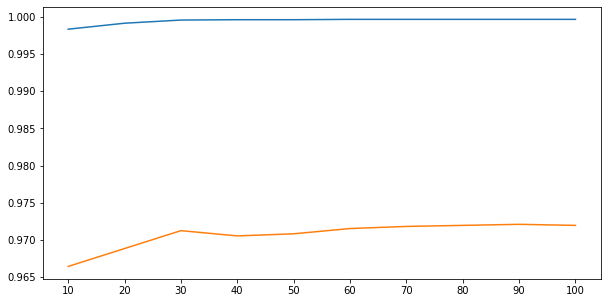

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 101, 10))
plt.plot(range(10, 101, 10), train_score)
plt.plot(range(10, 101, 10), eval_score)